<a href="https://colab.research.google.com/github/krish10007/nyc-311-resolution-time-ml/blob/main/NYC311RequestsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("/content/drive/MyDrive/311_Service_Requests_from_2020_to_Present_20260108.csv")

In [4]:
df.shape

(118219, 44)

In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Problem (formerly Complaint Type)',
       'Problem Detail (formerly Descriptor)', 'Additional Details',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Council District',
       'Police Precinct', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Problem (formerly Complaint Type),Problem Detail (formerly Descriptor),Additional Details,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,61659076,06/30/2024 11:52:08 PM,06/30/2024 11:53:56 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NaN,Street/Sidewalk,10034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867258,-73.929342,POINT (-73.929341829206 40.867257972283)
1,61661118,06/30/2024 11:48:53 PM,06/30/2024 11:59:15 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,NaN,Street/Sidewalk,10040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854621,-73.928987,POINT (-73.928986540492 40.854621156527)
2,61659030,06/30/2024 11:48:23 PM,06/30/2024 11:54:49 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,Residential Building/House,10033.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.850315,-73.934326,POINT (-73.93432629172 40.850315134956)
3,61654976,06/30/2024 11:45:02 PM,06/30/2024 11:58:58 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NaN,Street/Sidewalk,10032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837333,-73.940060,POINT (-73.94005990668 40.837333044485)
4,61660061,06/30/2024 11:44:24 PM,06/30/2024 11:46:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NaN,Street/Sidewalk,10032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837333,-73.940060,POINT (-73.94005990668 40.837333044485)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118219 entries, 0 to 118218
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unique Key                            118219 non-null  int64  
 1   Created Date                          118219 non-null  object 
 2   Closed Date                           118219 non-null  object 
 3   Agency                                118219 non-null  object 
 4   Agency Name                           118219 non-null  object 
 5   Problem (formerly Complaint Type)     118219 non-null  object 
 6   Problem Detail (formerly Descriptor)  118219 non-null  object 
 7   Additional Details                    9952 non-null    object 
 8   Location Type                         118219 non-null  object 
 9   Incident Zip                          118180 non-null  float64
 10  Incident Address                      118219 non-null  object 
 11  

In [8]:
# Convert to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Target variable: resolution time in minutes
df['resolution_minutes'] = (
    df['Closed Date'] - df['Created Date']
).dt.total_seconds() / 60


/tmp/ipython-input-451069258.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
/tmp/ipython-input-451069258.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')


In [9]:
df['resolution_minutes'].describe()


,resolution_minutes
count,118219.000000
mean,2563.989771
std,10624.167111
min,0.166667
25%,18.850000
50%,33.716667
75%,62.633333
max,93624.000000


In [11]:
features = [
    'Agency',
    'Problem (formerly Complaint Type)',
    'Problem Detail (formerly Descriptor)',
    'Location Type',
    'Incident Zip',
    'Borough'
]

target = 'resolution_minutes'

df_ml = df[features + [target]]


In [13]:
df_ml.shape


(118219, 7)

In [14]:
df_ml.head()

,Agency,Problem (formerly Complaint Type),Problem Detail (formerly Descriptor),Location Type,Incident Zip,Borough,resolution_minutes
0,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,MANHATTAN,1.800000
1,NYPD,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10040.0,MANHATTAN,10.366667
2,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10033.0,MANHATTAN,6.433333
3,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10032.0,MANHATTAN,13.933333
4,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10032.0,MANHATTAN,2.066667


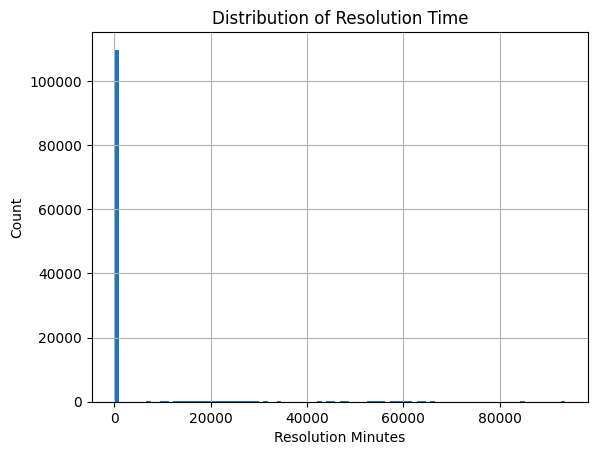

In [15]:
import matplotlib.pyplot as plt

df['resolution_minutes'].hist(bins=100)
plt.xlabel("Resolution Minutes")
plt.ylabel("Count")
plt.title("Distribution of Resolution Time")
plt.show()


In [16]:
(df['resolution_minutes'] <= 10080).mean()


np.float64(0.9323543592823489)

In [17]:
df = df[df['resolution_minutes'] <= 10080]


In [18]:
df['resolution_minutes'].describe()


,resolution_minutes
count,110222.000000
mean,79.904357
std,530.177891
min,0.166667
25%,17.866667
50%,31.483333
75%,52.883333
max,10062.650000


In [19]:
df_ml.isna().mean().sort_values(ascending=False)


,0
Incident Zip,0.00033
Problem (formerly Complaint Type),0.00000
Agency,0.00000
Problem Detail (formerly Descriptor),0.00000
Location Type,0.00000
Borough,0.00000
resolution_minutes,0.00000


In [26]:
df_ml['Incident Zip'] = pd.to_numeric(
    df_ml['Incident Zip'],
    errors='coerce'
)



In [27]:
df_ml = df_ml.dropna(subset=['Incident Zip'])


In [28]:
df_ml['Incident Zip'] = df_ml['Incident Zip'].astype('Int64').astype(str)


In [30]:
df_ml.shape


(118180, 7)

In [31]:
df_ml.dtypes

,0
Agency,object
Problem (formerly Complaint Type),object
Problem Detail (formerly Descriptor),object
Location Type,object
Incident Zip,object
Borough,object
resolution_minutes,float64


In [32]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns=['resolution_minutes'])
y = df_ml['resolution_minutes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((94544, 6), (23636, 6))

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


categorical_features = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse_output=True),
            categorical_features
        )
    ]
)


In [39]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [40]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Agency',
                                                   'Problem (formerly '
                                                   'Complaint Type)',
                                                   'Problem Detail (formerly '
                                                   'Descriptor)',
                                                   'Location Type',
                                                   'Incident Zip',
                                                   'Borough'])])),
                ('regressor', LinearRegression())])

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(1371.4304744386984, np.float64(5507.155207384193))

In [42]:
df_ml['log_resolution'] = np.log1p(df_ml['resolution_minutes'])


In [43]:
X = df_ml.drop(columns=['resolution_minutes', 'log_resolution'])
y = df_ml['log_resolution']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

mae_log = mean_absolute_error(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

mae_log, rmse_log


(0.6517387534185682, np.float64(0.8583136096918299))

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])


In [46]:
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Agency',
                                                   'Problem (formerly '
                                                   'Complaint Type)',
                                                   'Problem Detail (formerly '
                                                   'Descriptor)',
                                                   'Location Type',
                                                   'Incident Zip',
                                                   'Borough'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [47]:
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf


(0.6484762662929018, np.float64(0.8511030622728202))

In [48]:
import pandas as pd

rf = rf_model.named_steps['regressor']
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']

feature_names = ohe.get_feature_names_out(X_train.columns)

importances = rf.feature_importances_

fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head(15)


,feature,importance
1,Agency_NYPD,0.508414
4,Problem (formerly Complaint Type)_Noise - Heli...,0.162983
34,Location Type_Above Address,0.153444
0,Agency_EDC,0.134247
79,Incident Zip_10040,0.005796
73,Incident Zip_10034,0.005771
72,Incident Zip_10033,0.003497
2,Problem (formerly Complaint Type)_Illegal Parking,0.002632
78,Incident Zip_10039,0.000982
58,Incident Zip_10019,0.000893
